In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

np.random.seed(35)

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/h5py/__init__.py:34: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/h5py/__init__.py:43: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/h5py/_hl/group.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)


11493376/11490434 [==============================] - 2s     
('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))
('X_test original shape', (10000, 28, 28))
('y_test original shape', (10000,))


[5 0 4 ... 5 6 8]


Text(0.5,1,u'5')

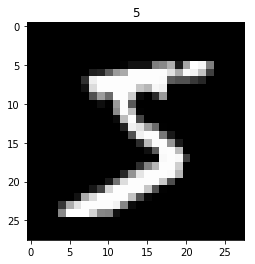

In [3]:
print(y_train)
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])

In [4]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255 

In [6]:
number_of_classes = 10


# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [8]:
model = Sequential()

model.add(Dense(512, input_dim=784))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
size = int(len(X_train) * 0.8)

train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

In [11]:
model.fit(train_x, train_y, batch_size=128, nb_epoch=5, validation_data=(val_x, val_y))

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 38s - loss: 0.2906 - acc: 0.9112 - val_loss: 0.1205 - val_acc: 0.9647
Epoch 2/5
48000/48000 [==============================] - 38s - loss: 0.1176 - acc: 0.9639 - val_loss: 0.1005 - val_acc: 0.9704
Epoch 3/5
48000/48000 [==============================] - 34s - loss: 0.0874 - acc: 0.9727 - val_loss: 0.1135 - val_acc: 0.9679
Epoch 4/5
48000/48000 [==============================] - 34s - loss: 0.0686 - acc: 0.9786 - val_loss: 0.1061 - val_acc: 0.9678
Epoch 5/5
48000/48000 [==============================] - 36s - loss: 0.0571 - acc: 0.9812 - val_loss: 0.0897 - val_acc: 0.9748


In [12]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 2s     
()
('Test accuracy: ', 0.9759)


In [13]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output.csv', index=False)

10000/10000 [==============================] - 3s     
